In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data
data=pd.read_excel("Downloads/data for stacking question.xlsx",parse_dates=['ORDER_ACCEPTED_AT','NEXT_ORDER_AT'])

In [3]:
#examine the data
data.head()

,ORDER_ID,ORDER_ACCEPTED_AT,IS_STACKED,CUSTOMER_ID,NEXT_ORDER_AT,RIDER_COST_GBP,CUSTOMER_COMPENSATION_GBP,REVENUE_GBP
0,520547832784906,2019-03-14 19:53:06.174,False,3277890510222238366,NaT,6.504539,3.009077,20.009077
1,2473846445738140,2019-04-20 21:47:36.789,False,2334065452540108497,2019-04-21 20:47:02.998,6.720080,3.440161,20.440161
2,2791273726589380096,2019-03-02 17:05:17.295,False,320456040296798965,2019-03-03 12:55:14.796,5.935463,0.000000,18.870926
3,5452699985020399616,2019-03-02 18:42:59.290,False,3044927327853533142,2019-03-03 19:03:56.484,5.479073,0.000000,17.958146
4,1000459218264961875,2019-04-12 11:58:29.335,False,3705059906007268874,2019-04-12 17:37:11.715,6.339042,0.000000,19.678085


In [4]:
#check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
ORDER_ID                     10000 non-null int64
ORDER_ACCEPTED_AT            10000 non-null datetime64[ns]
IS_STACKED                   10000 non-null bool
CUSTOMER_ID                  10000 non-null int64
NEXT_ORDER_AT                7819 non-null datetime64[ns]
RIDER_COST_GBP               10000 non-null float64
CUSTOMER_COMPENSATION_GBP    10000 non-null float64
REVENUE_GBP                  10000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(3), int64(2)
memory usage: 556.7 KB


In [5]:
data.shape

(10000, 8)

# How many stacked deliveries?

In [6]:
data['IS_STACKED'].value_counts()

False    7327
True     2673
Name: IS_STACKED, dtype: int64

In [7]:
data=data.sort_values(['CUSTOMER_COMPENSATION_GBP'])

# How many times there were customer compensation paid when the delivery was stacked?

In [8]:
stack_comp=(len(data['CUSTOMER_COMPENSATION_GBP'][(data['IS_STACKED']==True)&(data['CUSTOMER_COMPENSATION_GBP']>0)]))

In [9]:
stack_nocomp=(len(data['CUSTOMER_COMPENSATION_GBP'][(data['IS_STACKED']==True)&(data['CUSTOMER_COMPENSATION_GBP']<=0)]))

In [10]:
stack_comp/(stack_comp+stack_nocomp)

0.3550317994762439

In [11]:
stack_nocomp/(stack_comp+stack_nocomp)

0.644968200523756

In [12]:
# 64.49% the stacked order has ended up paying compensation

# How many times there were customer compensation paid when the delivery was not stacked?

In [13]:
nostack_comp=(len(data['CUSTOMER_COMPENSATION_GBP'][(data['IS_STACKED']==False)&(data['CUSTOMER_COMPENSATION_GBP']>0)]))

In [14]:
nostack_nocomp=(len(data['CUSTOMER_COMPENSATION_GBP'][(data['IS_STACKED']==False)&(data['CUSTOMER_COMPENSATION_GBP']<=0)]))

In [15]:
nostack_comp/(nostack_comp+nostack_nocomp)

0.3180019107410946

In [16]:
nostack_nocomp/(nostack_comp+nostack_nocomp)

0.6819980892589054

In [17]:
# 31.8% the no stacked order has ended up paying compensation

In [18]:
stack_df=pd.DataFrame({'Stack':['Stack','Stack','No Stack','No Stack'],
                      'Comp':[stack_comp,stack_nocomp,nostack_comp,nostack_nocomp],
                       'Paid':['Yes','No','Yes','No']})

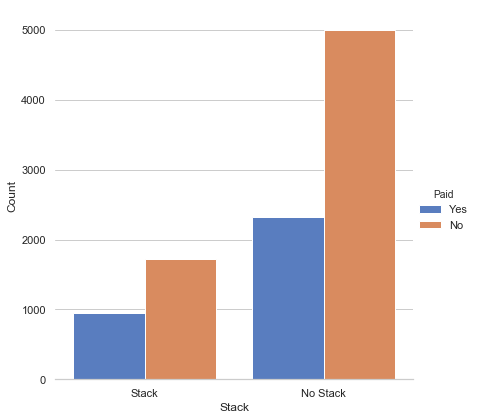

In [19]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.catplot(x="Stack", y="Comp", hue="Paid", data=stack_df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Count")

In [20]:
#create new field diff to find after how many days the next order is placed

In [21]:
data['diff']=data['NEXT_ORDER_AT']-data['ORDER_ACCEPTED_AT']

In [22]:
data['diff_days']=data['diff'].dt.days

# Revenue Analysis

In [23]:
#discretizing data for revenue
data['Revenue_Range']=pd.cut(data['REVENUE_GBP'],[9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27],
                         labels=[9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])

In [24]:
revenue_range=pd.DataFrame(data['Revenue_Range'].value_counts())

Text(0, 0.5, 'Count of orders')

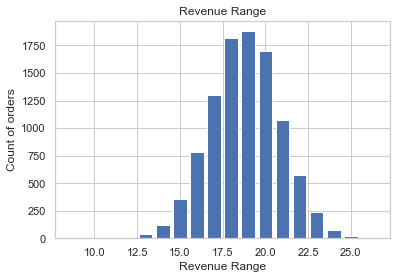

In [25]:
plt.bar(revenue_range.index,revenue_range['Revenue_Range'])
plt.title("Revenue Range")
plt.xlabel("Revenue Range")
plt.ylabel("Count of orders")

In [26]:
#create a new dataframe to analyze the data on days when revenue is the highest
high_revenue=data[data['Revenue_Range']==19]

In [27]:
high_revenue['IS_STACKED'].value_counts()

False    1387
True      492
Name: IS_STACKED, dtype: int64

In [28]:
#most of the revenue is from non-stacked orders

# Revenue Analysis for Stacked and Unstacked orders

In [29]:
#Discretize the customer compensation and roders cost to understand the distribution

In [30]:
data['Cust_BGP_Range']=pd.cut(data['CUSTOMER_COMPENSATION_GBP'],[-1,0,1,2,3,4,5,6,7,8,9],
                         labels=[0,1,2,3,4,5,6,7,8,9])

In [31]:
data['Rider_cost_Range']=pd.cut(data['RIDER_COST_GBP'],[0,2,3,4,5,6,7,8,9,10],
                         labels=[1,2,3,4,5,6,7,8,9])

In [32]:
stack = data[data['IS_STACKED']==True]
unstack = data[data['IS_STACKED']==False]

In [33]:
stack_revenue=pd.DataFrame(stack['Revenue_Range'].value_counts())
unstack_revenue=pd.DataFrame(unstack['Revenue_Range'].value_counts())

In [34]:
stack_cust_gbp=pd.DataFrame(stack['Cust_BGP_Range'].value_counts())
unstack_cust_gbp=pd.DataFrame(unstack['Cust_BGP_Range'].value_counts())

In [35]:
stack_rider_gbp=pd.DataFrame(stack['Rider_cost_Range'].value_counts())
unstack_rider_gbp=pd.DataFrame(unstack['Rider_cost_Range'].value_counts())

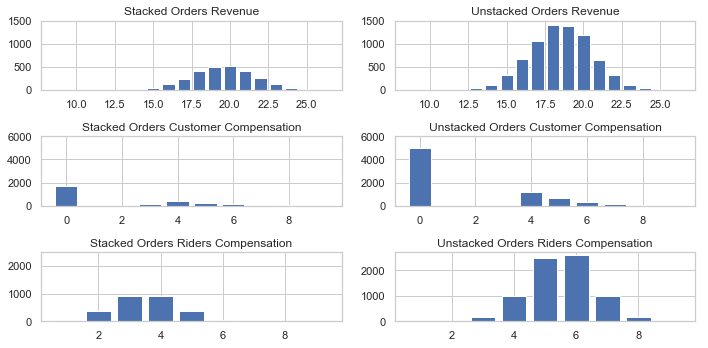

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(3,2,1)
plt.bar(stack_revenue.index,stack_revenue['Revenue_Range'])
plt.title("Stacked Orders Revenue")
plt.ylim(0,1500)
plt.subplot(3,2,2)
plt.title("Unstacked Orders Revenue")
plt.bar(unstack_revenue.index,unstack_revenue['Revenue_Range'])
plt.ylim(0,1500)
plt.subplot(3,2,3)
plt.bar(stack_cust_gbp.index,stack_cust_gbp['Cust_BGP_Range'])
plt.ylim(0,6000)
plt.title("Stacked Orders Customer Compensation")
plt.subplot(3,2,4)
plt.title("Unstacked Orders Customer Compensation")
plt.bar(unstack_cust_gbp.index,unstack_cust_gbp['Cust_BGP_Range'])
plt.ylim(0,6000)

plt.subplot(3,2,5)
plt.bar(stack_rider_gbp.index,stack_rider_gbp['Rider_cost_Range'])
plt.ylim(0,2500)
plt.title("Stacked Orders Riders Compensation")
plt.subplot(3,2,6)
plt.title("Unstacked Orders Riders Compensation")
plt.bar(unstack_rider_gbp.index,unstack_rider_gbp['Rider_cost_Range'])
#plt.ylim(0,6000)
plt.tight_layout()

plt.tight_layout()

In [37]:
print("STACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(stack['CUSTOMER_COMPENSATION_GBP']))
print("Average Revenue:              ",np.mean(stack['REVENUE_GBP']))
print("Average Riders Cost:          ",np.mean(stack['RIDER_COST_GBP']))

STACKED ORDERS:

Average Customer Compensation: 1.4537844432300777
Average Revenue:               20.01323834676057
Average Riders Cost:           4.006619173375421


In [38]:
print("UNSTACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(unstack['CUSTOMER_COMPENSATION_GBP']))
print("Average Revenue:              ",np.mean(unstack['REVENUE_GBP']))
print("Average Riders Cost:          ",np.mean(unstack['RIDER_COST_GBP']))

UNSTACKED ORDERS:

Average Customer Compensation: 1.3482279832664106
Average Revenue:               19.021284676132236
Average Riders Cost:           6.01064233807275


# Analysis based on peak hours

In [39]:
hours=[]
for i in data['ORDER_ACCEPTED_AT']:
    t=i.to_pydatetime()
    hours.append(t.hour)
minutes=[]
for i in data['ORDER_ACCEPTED_AT']:
    t=i.to_pydatetime()
    minutes.append(t.minute)
    
    
data['Minute']=minutes
data['Hour']=hours

Text(0, 0.5, 'Count')

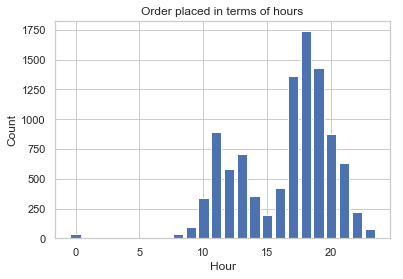

In [40]:
plt.bar(data['Hour'].value_counts().index,data['Hour'].value_counts())
plt.title("Order placed in terms of hours")
plt.xlabel("Hour")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

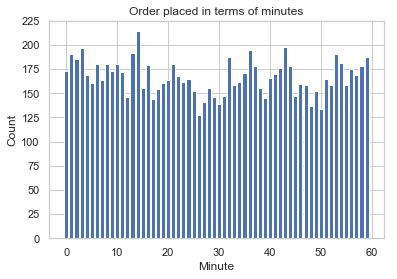

In [41]:
plt.bar(data['Minute'].value_counts().index,data['Minute'].value_counts())
plt.title("Order placed in terms of minutes")
plt.xlabel("Minute")
plt.ylabel("Count")

In [42]:
#Inference: There is no specific minute at which more orders are palced.
#There is no definite pattern. Hence this minute information is not of much use.

In [43]:
peak=data[(data['Hour']>=17)&(data['Hour']<=21)]

In [44]:
print("STACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(peak['CUSTOMER_COMPENSATION_GBP'][peak['IS_STACKED']==True]))
print("Average Revenue:              ",np.mean(peak['REVENUE_GBP'][peak['IS_STACKED']==True]))
print("Average Riders Cost:          ",np.mean(peak['RIDER_COST_GBP'][peak['IS_STACKED']==True]))

STACKED ORDERS:

Average Customer Compensation: 1.4611534677275047
Average Revenue:               20.035064155431005
Average Riders Cost:           4.017532077708996


In [45]:
print("UNSTACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(peak['CUSTOMER_COMPENSATION_GBP'][peak['IS_STACKED']==False]))
print("Average Revenue:              ",np.mean(peak['REVENUE_GBP'][peak['IS_STACKED']==False]))
print("Average Riders Cost:          ",np.mean(peak['RIDER_COST_GBP'][peak['IS_STACKED']==False]))

UNSTACKED ORDERS:

Average Customer Compensation: 1.3907726149538897
Average Revenue:               19.06102691955948
Average Riders Cost:           6.0305134597902805


# Analysis based on non-peak hours

In [46]:
nopeak=data[np.logical_not(data['Hour']>=17)&(data['Hour']<=21)]

In [47]:
print("STACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(nopeak['CUSTOMER_COMPENSATION_GBP'][nopeak['IS_STACKED']==True]))
print("Average Revenue:              ",np.mean(nopeak['REVENUE_GBP'][nopeak['IS_STACKED']==True]))
print("Average Riders Cost:          ",np.mean(nopeak['RIDER_COST_GBP'][nopeak['IS_STACKED']==True]))

STACKED ORDERS:

Average Customer Compensation: 1.446377597836115
Average Revenue:               19.95418561054781
Average Riders Cost:           3.977092805271171


In [48]:
print("UNSTACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(nopeak['CUSTOMER_COMPENSATION_GBP'][nopeak['IS_STACKED']==False]))
print("Average Revenue:              ",np.mean(nopeak['REVENUE_GBP'][nopeak['IS_STACKED']==False]))
print("Average Riders Cost:          ",np.mean(nopeak['RIDER_COST_GBP'][nopeak['IS_STACKED']==False]))

UNSTACKED ORDERS:

Average Customer Compensation: 1.3070428589499175
Average Revenue:               18.98341755249519
Average Riders Cost:           5.9917087762497605


# Analysis on the day of highest number of orders

In [49]:
data['date']=data['ORDER_ACCEPTED_AT'].dt.date

In [50]:
data['date'].value_counts().head()

2019-03-02    716
2019-04-20    527
2019-04-05    423
2019-03-27    358
2019-04-02    358
Name: date, dtype: int64

In [51]:
data['date']=pd.to_datetime(data['date'], errors='coerce')

In [52]:
high=data[data['date']=='2019-03-02']

In [53]:
high['IS_STACKED'].value_counts()

False    682
True      34
Name: IS_STACKED, dtype: int64

In [54]:
print("STACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(high['CUSTOMER_COMPENSATION_GBP'][high['IS_STACKED']==True]))
print("Average Revenue:              ",np.mean(high['REVENUE_GBP'][high['IS_STACKED']==True]))
print("Average Riders Cost:          ",np.mean(high['RIDER_COST_GBP'][high['IS_STACKED']==True]))

STACKED ORDERS:

Average Customer Compensation: 1.2809123249117649
Average Revenue:               19.597791563441177
Average Riders Cost:           3.7988957818235294


In [55]:
print("UNSTACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(high['CUSTOMER_COMPENSATION_GBP'][high['IS_STACKED']==False]))
print("Average Revenue:              ",np.mean(high['REVENUE_GBP'][high['IS_STACKED']==False]))
print("Average Riders Cost:          ",np.mean(high['RIDER_COST_GBP'][high['IS_STACKED']==False]))

UNSTACKED ORDERS:

Average Customer Compensation: 1.2988795828651034
Average Revenue:               19.08643946740762
Average Riders Cost:           6.043219733692083


# Analysis only on orders where next order was placed

In [56]:
next_order=data[np.logical_not(data['NEXT_ORDER_AT'].isnull())]

In [57]:
print("STACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(next_order['CUSTOMER_COMPENSATION_GBP'][next_order['IS_STACKED']==True]))
print("Average Revenue:              ",np.mean(next_order['REVENUE_GBP'][next_order['IS_STACKED']==True]))
print("Average Riders Cost:          ",np.mean(next_order['RIDER_COST_GBP'][next_order['IS_STACKED']==True]))

STACKED ORDERS:

Average Customer Compensation: 1.43681567616951
Average Revenue:               20.006987437123637
Average Riders Cost:           4.003493718551906


In [58]:
print("UNSTACKED ORDERS:")
print("")
print("Average Customer Compensation:",np.mean(next_order['CUSTOMER_COMPENSATION_GBP'][next_order['IS_STACKED']==False]))
print("Average Revenue:              ",np.mean(next_order['REVENUE_GBP'][next_order['IS_STACKED']==False]))
print("Average Riders Cost:          ",np.mean(next_order['RIDER_COST_GBP'][next_order['IS_STACKED']==False]))

UNSTACKED ORDERS:

Average Customer Compensation: 1.3627529546107853
Average Revenue:               19.04431374752078
Average Riders Cost:           6.0221568737622455


In [59]:
data.isnull().sum()

ORDER_ID                        0
ORDER_ACCEPTED_AT               0
IS_STACKED                      0
CUSTOMER_ID                     0
NEXT_ORDER_AT                2181
RIDER_COST_GBP                  0
CUSTOMER_COMPENSATION_GBP       0
REVENUE_GBP                     0
diff                         2181
diff_days                    2181
Revenue_Range                   0
Cust_BGP_Range                  2
Rider_cost_Range                0
Minute                          0
Hour                            0
date                            0
dtype: int64

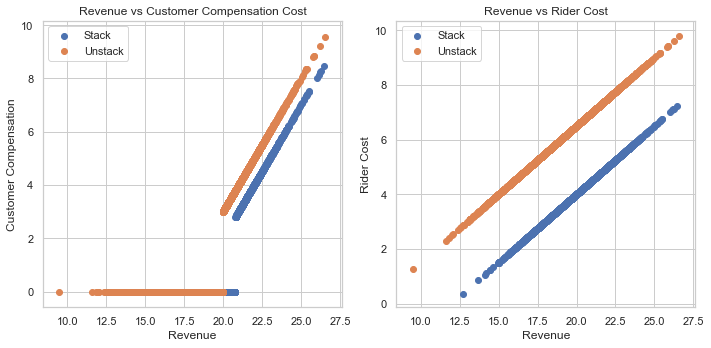

In [60]:
figure=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(data['REVENUE_GBP'][data['IS_STACKED']==True],data['CUSTOMER_COMPENSATION_GBP'][data['IS_STACKED']==True])
plt.scatter(data['REVENUE_GBP'][data['IS_STACKED']==False],data['CUSTOMER_COMPENSATION_GBP'][data['IS_STACKED']==False])
plt.legend(('Stack','Unstack'))
plt.xlabel("Revenue")
plt.ylabel("Customer Compensation")
plt.title("Revenue vs Customer Compensation Cost")

plt.subplot(1,2,2)
plt.scatter(data['REVENUE_GBP'][data['IS_STACKED']==True],data['RIDER_COST_GBP'][data['IS_STACKED']==True])
plt.scatter(data['REVENUE_GBP'][data['IS_STACKED']==False],data['RIDER_COST_GBP'][data['IS_STACKED']==False])
plt.legend(('Stack','Unstack'))
plt.xlabel("Revenue")
plt.ylabel("Rider Cost")
plt.title("Revenue vs Rider Cost")
plt.tight_layout()